# Prototype NLP Tasks - Task 3

## Domain description data clustering

### a.	Brief Literature review of the NLP task
K-means clustering is a broadly used method that has many applications (Sharma, 2019). It is used in areas including Customer Segmentation, Document Clustering, Image Segmentation and Recommendation Engines (Sharma, 2019). There are various circumstances where K-means clustering has been used for Document Clustering in applications such as email clustering (Foley, 2019), clustering Department of Justice press releases (B, 2018) and movie classification (Rose, n.d.). There appears to be limited application of the k-means clustering algorithm on classifieds data, with only one research paper identified that utilises the algorithm for a similar purpose. In this paper, they use k-means clustering to compliment a regression model by feeding the classifications to inform the model to then make further predictions (Abdallah, 2015). By considering both structured and unstructured data such as free form text, this paper reports that their regression model was more accurate than using just the structured data alone (Abdallah, 2015).

### b.	Rational for selection of the NLP task
This methodology was selected because it is a well-established method of clustering of data. The ability to identify keywords from each cluster using the TF-IDF scores meant that it was effective in identifying the keywords that represented each cluster. This therefore separated the data to feed into the sentiment analysis. The method also has the additional benefit and flexibility to adjust the number of clusters based on an objective function such as minimising the sum of the squares distances to select a reasonable number of clusters. Using this method, the top keywords from each cluster were identified and then used as inputs for the sentiment analysis.  

### c.	Data pre-processing of the inputs and outputs, separate from the WebCrawler harvesting

Various steps were completed in order to prepare the data for k-means clustering, these included removal of various symbols, numbers and letter/symbol sequences. The steps completed prior to clustering were as follows:
1.	Remove all symbols such as commas, full stops, dashes, and apostrophes
2.	Remove COVID related words such as vaccine, status, mask, status and guidelines
3.	Remove any links or text relating to URLs such as “http” or “www”
4.	Tokenise data using the nltk.tokenize package
5.	Remove two letter words
6.	Remove any stopwords
7.	Apply stemming to the data using nltk SnowballStemmer
This process meant that the data was adequately cleaned and simplified to enable effective clustering of the description data and therefore identification of keywords that would split this data. 
Once the keywords were identified after the K-means clustering was completed, the top 20 keywords for each cluster were extracted and saved in a csv file, ready to be used as an input for the sentiment analysis.

### d.	Specification and justification of hyperparameters
The data set was vectorized using the TFIDF Vectorizer and then fed into the K-means algorithm. The Sklearn cluster package was used for the clustering of the description data. For this package, there are the following parameter inputs:

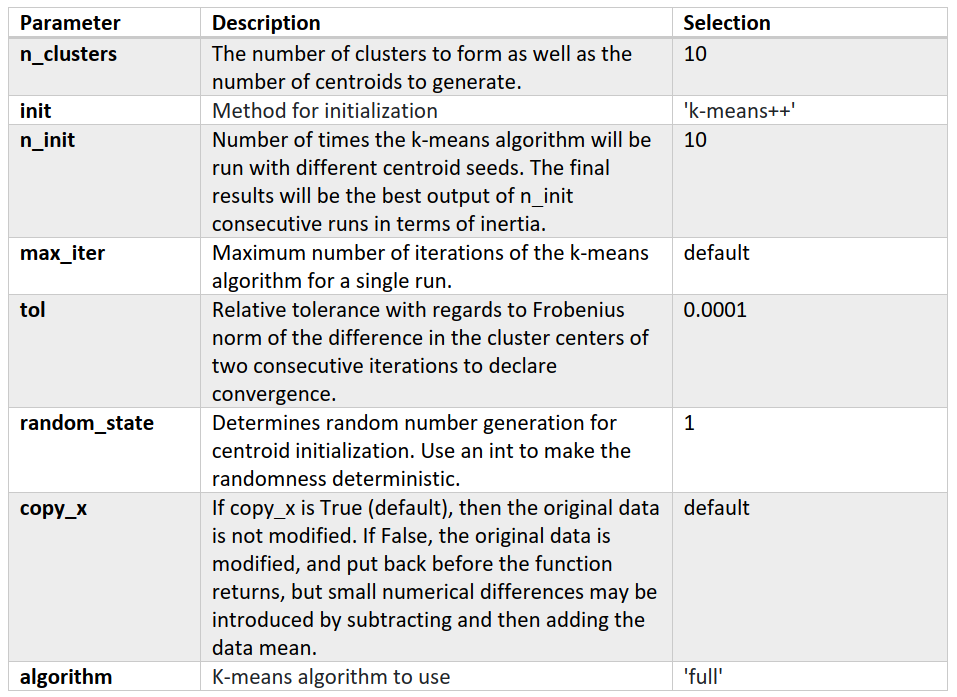

Table 1. Hyperparameter inputs for Kmeans clustering algorithm

The most important parameter for the k-means algorithm is the selection of the number of clusters. The selection of this value was completed using the Elbow method to minimise the sum of the squares difference between clusters. This is completed by select the number of clusters at which the gradient of the sum of the squares starts to change as shown in the plot below (figure 1).

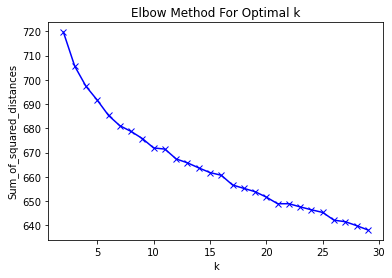

Figure 1. Elbow plot for selection of number of clusters

### e.	Preliminary assessment of NLP task performance 
Review of the TF-IDF score plots for each clusters keywords shows that there are certain clusters that are well defined by a single word. Whereas there are other clusters that are more evenly spread in terms of the TF-IDF scores. This disparity is exemplified by the two plots below (Figure 2 and 3) which shows that cluster 0 contains a high score for the word “home”, whereas cluster 3 shows a more even distribution between scores between words.

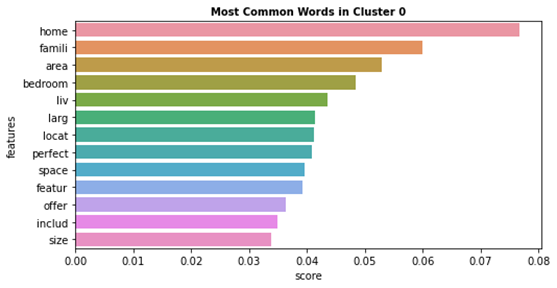  

Figure 2. Cluster 0 keyword scores

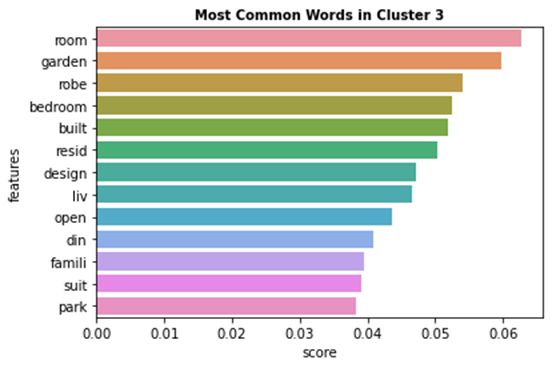
Figure 3. Cluster 3 keyword scores

Review of the Silhouette plot in Figure 4 shows that some clusters contain property descriptions that may not be well defined by that particular cluster. However, for the purposes of keyword identification this is still deemed adequate as it is not critical to have a complete set of well-defined clusters.

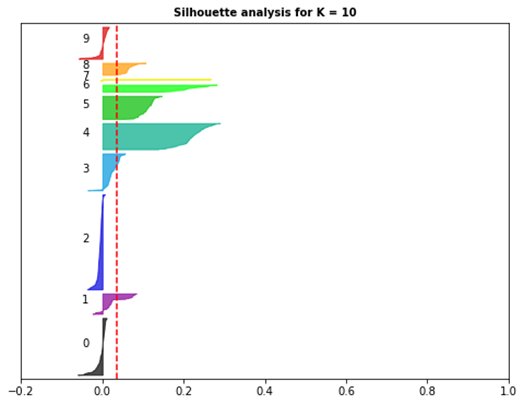
Figure 4. Silhouette plot for 10 cluster model

### f. Code

[nltk_data] Downloading package stopwords to C:\Users\Darcy
[nltk_data]     Richardson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Darcy
[nltk_data]     Richardson\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


818 rows


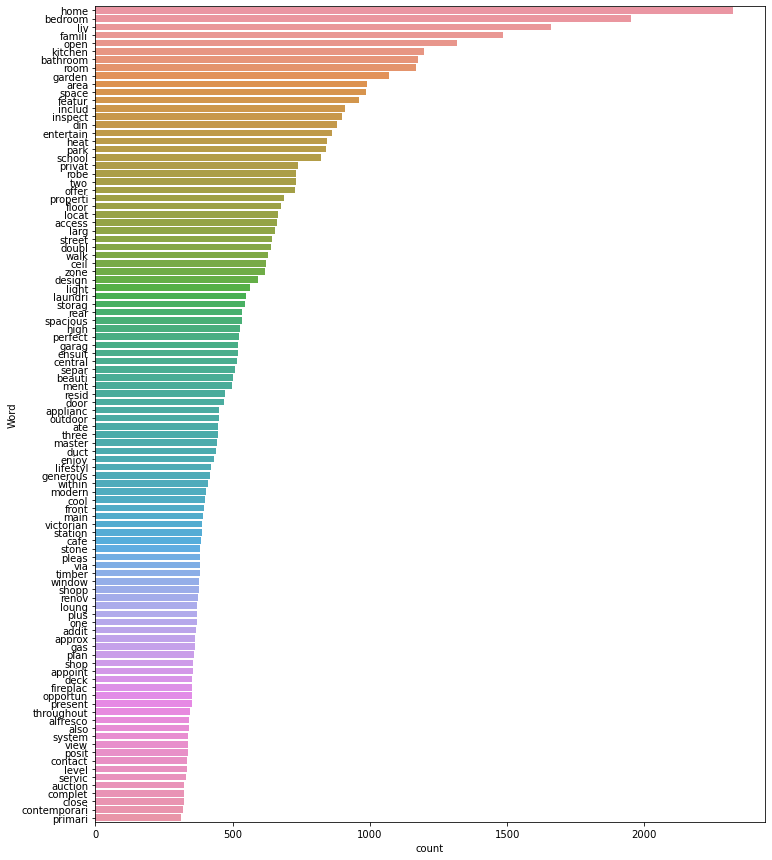

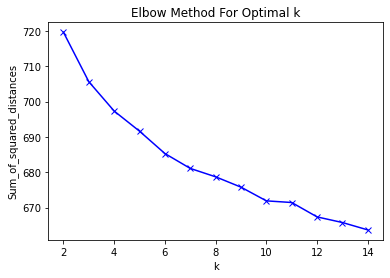

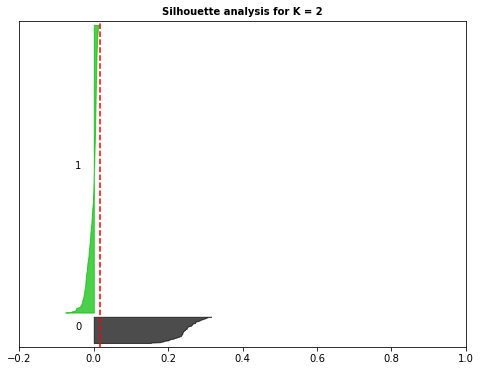

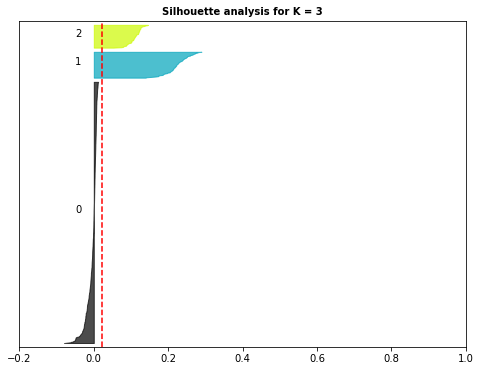

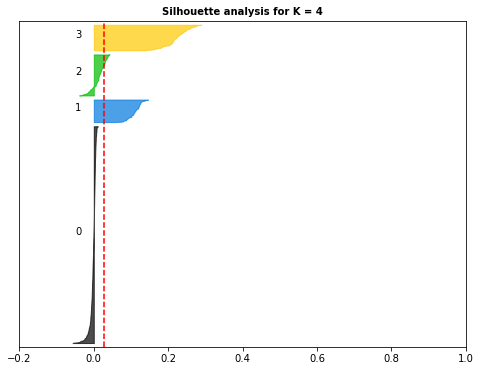

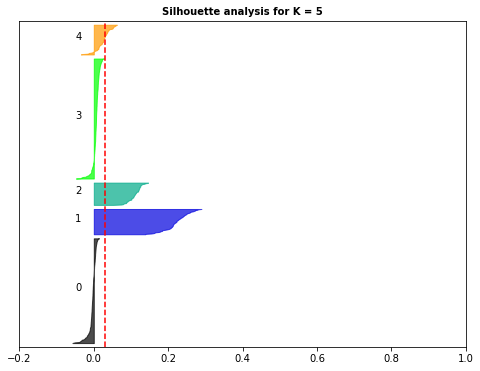

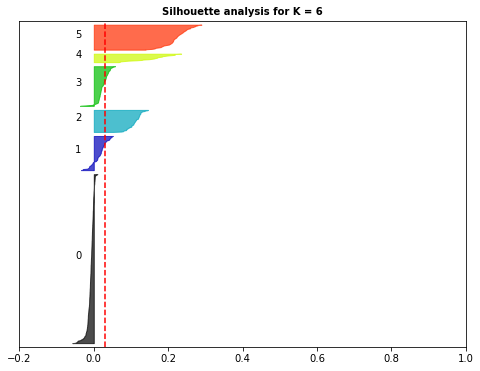

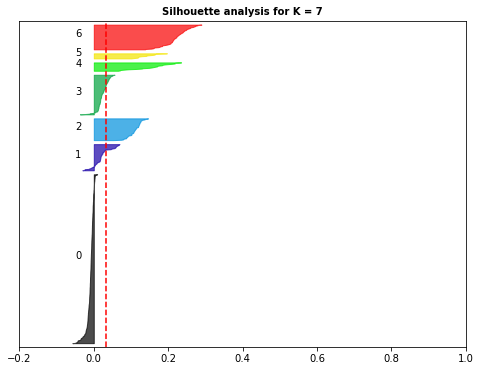

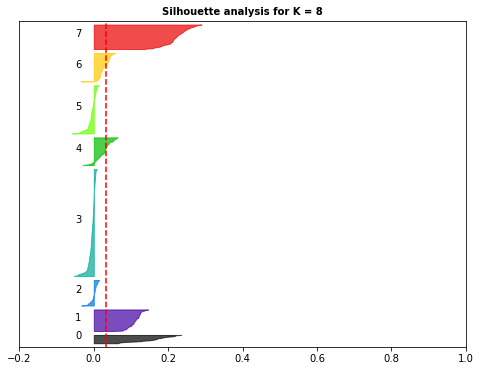

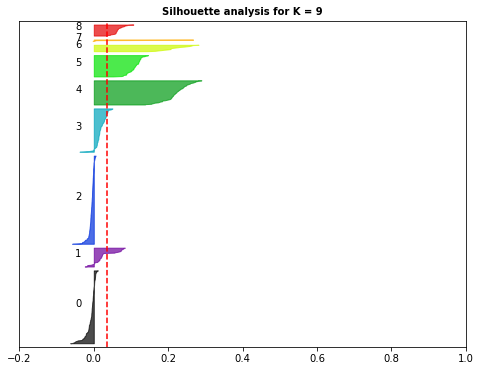

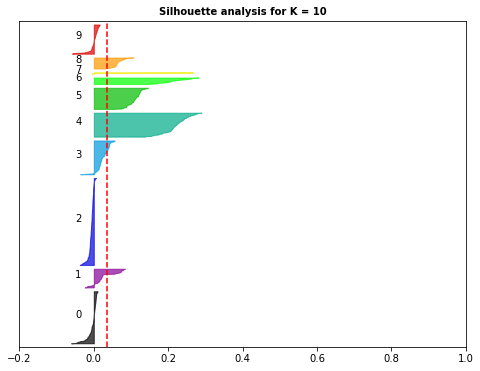

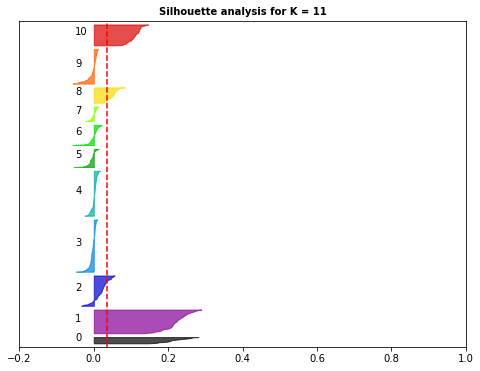

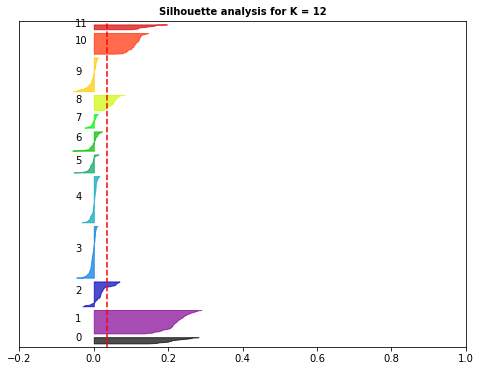

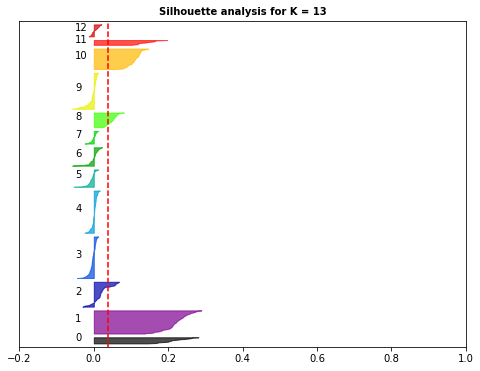

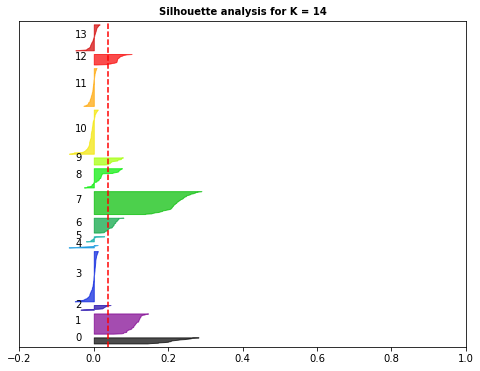

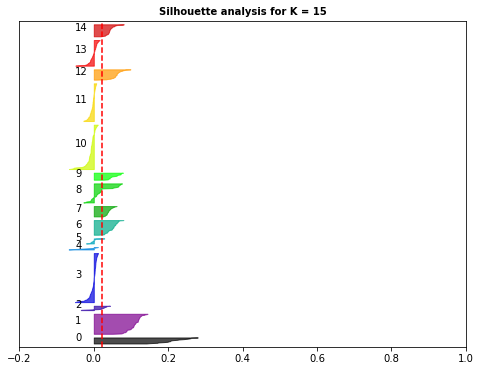

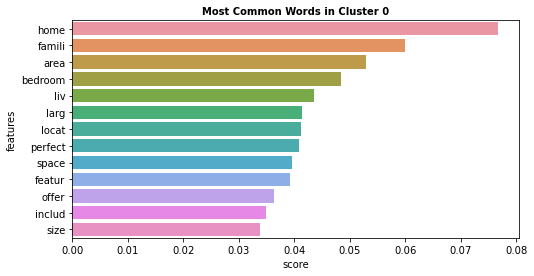

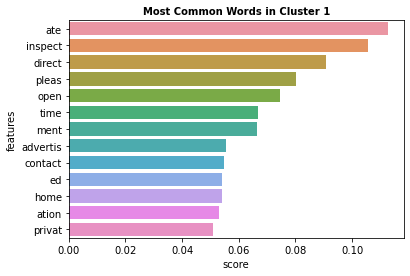

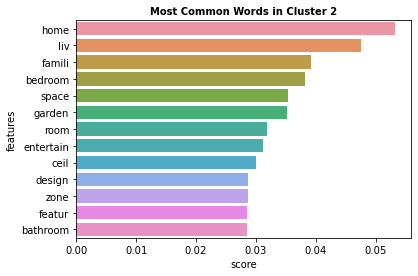

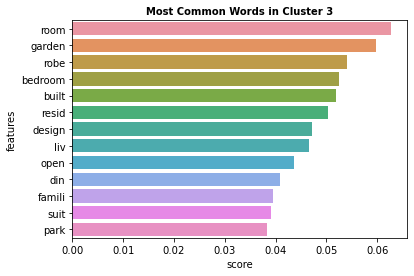

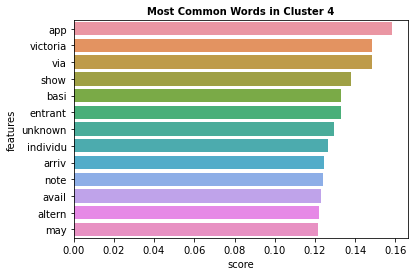

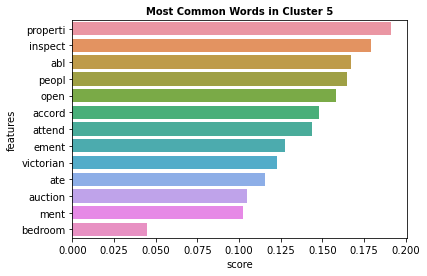

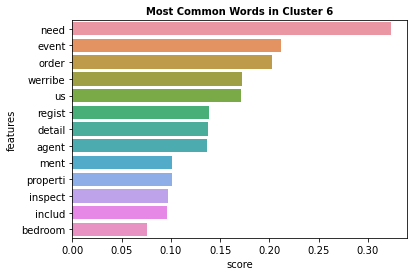

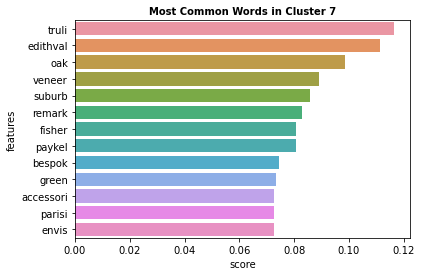

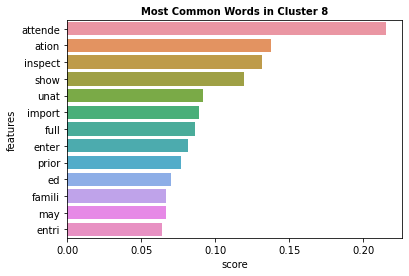

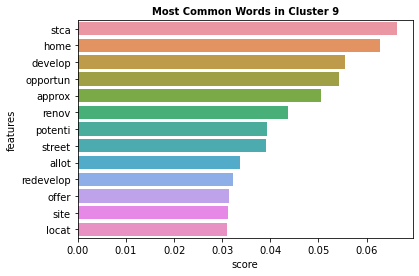

In [1]:
# Data Structures
import numpy  as np
import pandas as pd
#import geopandas as gpd
#import json

# Corpus Processing
import re
import nltk.corpus
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

# Load data
property_descriptions=pd.read_csv('G:\\My Drive\\Data science\\21-B-MA5851-ONL-EXT-SP86 Data Science Master Class 1\\Assessment 3\\descriptions.csv')

corpus=property_descriptions['description'].tolist()

# EDA
description_lengths={'length':[]}
for i in range(len(property_descriptions)):
    length=len(property_descriptions.iloc[i,1])
    description_lengths['length'].append(length)


#1. Stop Words and Stemming
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

#2. The main corpus processing function
def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    filter_covid_words=['ing','vaccin','status','govern','proof','requir','fulli','vaccine','vaccination','unvaccinated','mask','exemption','exempt','follow','guideline','guidelines','evidence','qr','code','check','provide','face','wear']

    
    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].replace('-', '')
        corpus[index] = corpus[index].replace('.', '')
        corpus[index] = corpus[index].replace("'s", '')

        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        #remove covid words
        for string in filter_covid_words:
            corpus[index] = corpus[index].replace(string, "")

        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www
        corpus[index]=re.sub('(?:[^\w\s]|_)+', ' ', corpus[index])
        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)

        
        listOfTokens = applyStemming(listOfTokens, param_stemmer)

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])
        
        #filter covid words
        #remove covid words
        for string in filter_covid_words:
            corpus[index] = corpus[index].replace(string, "")
            
    return corpus

def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()


#3. Run processing
language = 'english'
corpus = processCorpus(corpus, language)
corpus[18][0:447]

#4. Statistical weighting of words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

# first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 0)

#Review word frequency
# print 100 most frequent words 
freq_words(corpus, 100)


#5. k-means algorithm for clustering
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               #, n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

#6. Silohouette scores
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)
        
        
#7. Run kmeans
k = 15
kmeans_results = run_KMeans(k, final_df)

#Review elbow
Sum_of_squared_distances = []
K = range(2,k)
for i in K:
    Sum_of_squared_distances.append(kmeans_results[i].inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#Review silhouette
silhouette(kmeans_results, final_df,plot=True)    

#8. Cluster analysis
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()
        
best_result = 10
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

#9. Select keywords to filter forum comments
flat_keyword={'keywords':[]}
for i in range(len(dfs)):
    for x in range(len(dfs[i])):
        flat_keyword['keywords'].append(dfs[i].iloc[x,0])
        
#delete duplicate values
flat_keyword['keywords']=list(set(flat_keyword['keywords']))

#Save data
keyword_df=pd.DataFrame(flat_keyword)

keyword_df.to_csv("keyword.csv",index=False)

## Whirlpool comment data sentiment analysis
### g.	Brief Literature review of the NLP task
Sentiment analysis is often used by businesses to gauge sentiment in social media, gauge brand reputation or understand customers (Monkey Learn, n.d.). Such methods can also be used by governments to gauge public opinion. For example, sentiment analysis was used by the Obama administration to gauge public opinion to policy announcements and campaign messages ahead of the 2012 presidential election (Bannister, 2018). However, sentiment analysis has limitations and is not always completely accurate, it can be error prone therefore it often requires review by human eye (Bannister, 2018). There are various examples in literature of using sentiment analysis to understand forum user sentiment (Li & Wu, 2010) (Sunberg, Eriksson, Bini, & Nugues, 2010). One piece of research used sentiment analysis as part of a broader strategy to identify “hotspot” forums, where useful information is quickly exposed to those seeking it. They used sentiment analysis to inform a k-means clustering algorithm to identify Hotspot forums that are closest to the theoretical centres of those clusters (Li & Wu, 2010). Another paper used various types of data including forum comment data to undertake a comprehensive comparison of sentiment analysis algorithms (Sunberg, Eriksson, Bini, & Nugues, 2010).

### h.	Rational for selection of the NLP task
The VADER Sentiment analysis package uses lexicon-based analysis to determine a polarity score to decide the assessment score of the content. It involves calculating semantic orientation of words or phrases that occur in a text (Kapoor, n.d.). One of the strengths of this method is that it does not require training data and therefore is easy to implement. It is also attuned to sentiments expressed in social media, making it appropriate to use in this context as the way comments are written in forums is likely to be similar (Hutto & Gilbert, 2014).

### i.	Data pre-processing of the inputs and outputs, separate from the WebCrawler harvesting
Prior to undertaking the sentiment analysis, various modifications to the data set were completed to prepare to ensure it was suitable for use. The keywords data from the clustering analysis were loaded and then used to identify comment sentences that contained these keywords. These sentences were then compiled into a dictionary and any duplicate sentences were removed (given that one sentence may contain more than one keyword). A summary table was then completed to compare keyword sentiments within the comment data.

### j.	Specification and justification of hyperparameters
No hyperparameters were used for the sentiment analysis as there are no hyperparameter inputs required to complete the sentiment analysis.

### k.	Preliminary assessment of NLP task performance
The table below (Table 2) shows the summary statistics for each keyword sentiment analysis using the Vader compound scores. Some keywords show extremely high or low mean sentiment scores such as the word “stylish” (0.637). These scores are not necessarily useful as they represent words that are only mentioned once within the comment data. Some keywords such as “entertain” have relatively high mean sentiment scores (0.497) from 38 mentions in the data, which appears reasonable. As the number of mentions increases, the mean sentiment scores appear to generally decrease. For example, the word “room” has 1009 mentions and a mean sentiment score of 0.1. 

In [7]:
#[Run code below before running display table]
display(summary)

compound                                                       \
             count      mean       std     min     25%     50%      75%   
keyword                                                                   
abl         2672.0  0.138233  0.397216 -0.9050  0.0000  0.0000  0.44040   
access       189.0  0.221597  0.452723 -0.8465  0.0000  0.2732  0.60590   
accord        93.0  0.086602  0.364125 -0.9074  0.0000  0.0000  0.27550   
advertis     195.0  0.023998  0.360170 -0.8834 -0.1027  0.0000  0.21895   
agent       1119.0  0.083587  0.374879 -0.9180 -0.1027  0.0000  0.38180   
...            ...       ...       ...     ...     ...     ...      ...   
victoria      75.0  0.011496  0.281737 -0.6486  0.0000  0.0000  0.00000   
victorian     21.0  0.124014  0.393304 -0.6249  0.0000  0.0000  0.27320   
walk         305.0  0.189260  0.423404 -0.8274  0.0000  0.0000  0.54230   
would       2747.0  0.135978  0.396664 -0.9726  0.0000  0.0000  0.44040   
zone         268.0  0.161948  0.383170 -0.8020  0.0000  0.0000  0.47105   

                   
              max  
keyword            
abl        0.9838  
access     0.9607  
accord     0.9234  
advertis   0.8805  
agent      0.9573  
...           ...  
victoria   0.9100  
victorian  0.9100  
walk       0.9838  
would      0.9774  
zone       0.9774  

[126 rows x 8 columns]

Table 2. Sentiment analysis summary for each keyword identified in cluster analysis

### l.	Code

In [4]:
#data structures
import numpy  as np
import pandas as pd


#1. Data wrangling
#Get forum comments
comments=pd.read_csv('G:\\My Drive\\Data science\\21-B-MA5851-ONL-EXT-SP86 Data Science Master Class 1\\Assessment 3\\comments.csv')

#EDA
comment_lengths={'length':[]}
for i in range(len(comments)):
    length=len(comments.iloc[i,0])
    comment_lengths['length'].append(length)


#Get keywords
keywords=pd.read_csv('keyword.csv')

#Make all comments lowercase

comments['comment'].str.lower()


keyword_sentences={'sentence':[],'keyword':[]}

#loop through comments
for i in range(len(comments)):
    comment=comments['comment'].iloc[i]

    #loop through keywords to extract sentences
    for x in range(len(keywords)):
        keyword=keywords['keywords'].iloc[x]
        
        #perform tokenisation and extract sentences with keywords
        sentence_strings=[sentence + '.' for sentence in comment.split('.') if keyword in sentence]
        
        #loop through append sentences to dictionary
        for y in range(len(sentence_strings)):
            keyword_sentences['sentence'].append(sentence_strings[y])
            keyword_sentences['keyword'].append(keyword)
            
#Remove duplicate sentences
keyword_sentences=pd.DataFrame(keyword_sentences)        
keyword_sentences=keyword_sentences.drop_duplicates()

keyword_sentences=keyword_sentences.reset_index()
keyword_sentences=keyword_sentences.drop('index',axis=1)

#2. Sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

#Complete sentiment analysis of comments
comments_sent = keyword_sentences.apply(lambda r: analyser.polarity_scores(r.sentence), axis=1)

df = pd.DataFrame(list(comments_sent))
compiled_sentiment = keyword_sentences.join(df)
compiled_sentiment['comp_score'] = compiled_sentiment['compound'].apply(lambda c: '1' if c >=0 else '0')

#3. Plot results for each keyword

#compiled_sentiment.groupby('keyword').hist(column=["compound"])

summary = compiled_sentiment.loc[:,['keyword', 'compound']]

summary=summary.groupby('keyword').describe()

## References
* Abdallah, S. (2015). Using Text Mining To Analyze Real Estate Classifieds. B, J. (2018). Clustering documents with TFIDF and KMeans. Retrieved from Kaggle: https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans
* Bannister, K. (2018, 2 26). Understanding Sentiment Analysis: What It Is & Why It’s Used. Retrieved from Brandwatch: https://www.brandwatch.com/blog/understanding-sentiment-analysis/  
* Foley, D. (2019, 2 9). K-Means Clustering. Retrieved from Towards Data Science: https://towardsdatascience.com/k-means clustering-8e1e64c1561c  
* Hutto, C. J., & Gilbert, E. E. (2014, June). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media. Ann Arbor, MI.
* Kapoor, N. (n.d.). Types of Sentiment Analysis and Its Uses. Retrieved from Start it up: https://medium.com/swlh/types-of-sentiment-analysis-and-its-uses-ad733535c895  
* Li, N., & Wu, D. D. (2010). Using text mining and sentiment analysis for online forums hotspot detection. Decision Support Systems, 354-368.  
* Monkey Learn. (n.d.). Sentiment Analysis: A Definitive Guide. Retrieved from MonkeyLearn: https://monkeylearn.com/sentiment-analysis/  
* Rose, B. (n.d.). Document Clustering with Python. Retrieved from Brandon Rose: http://brandonrose.org/clustering  
* Sharma, P. (2019, 8 19). The Most Comprehensive Guide to K-Means Clustering You’ll Ever Need. Retrieved from Analytics Vidhya: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/  
* Sunberg, R., Eriksson, A., Bini, J., & Nugues, P. (2010). Forum, Visualizing Sentiment Analysis on a User. Lund: Lund University.  

